# **Klasifikasi Risiko Kematian Pasien Berdasarkan Data Klinis Gagal Jantung**

# **Sumber Data**

https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

# **Integrasi Data**

---
Kode integrasi data menggunakan package ucimlrepo. Tujuannya adalah untuk mengambil data langsung dari UCI Machine Learning Repository, lalu membaginya menjadi fitur (X) dan target (y), serta mengeksplorasi metadata dan informasi variabel.


In [50]:
pip install ucimlrepo

In [51]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# metadata
print(heart_failure_clinical_records.metadata)

# variable information
print(heart_failure_clinical_records.variables)


{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'ID': 286, 'type': 'NATIVE', 'title': 'Machine learning can predict survival of patients with heart failure f

# **Data Understanding**


# **Setiap Fitur atau Variabel pada Dataset**
Dataset ini berisi informasi klinis pasien dengan gagal jantung (heart failure) dan bertujuan untuk memprediksi kemungkinan **kematian** selama masa tindak lanjut medis.

### **Fitur Klinis (12 fitur + 1 target)**

| **Nama Fitur**             | **Tipe Data**  | **Penjelasan**                                                                     |
| -------------------------- | -------------- | ---------------------------------------------------------------------------------- |
| `age`                      | Numerik        | Usia pasien dalam tahun                                                            |
| `anaemia`                  | Biner (0/1)    | 1 = pasien menderita anemia, 0 = tidak                                             |
| `creatinine_phosphokinase` | Numerik        | Kadar enzim CPK dalam darah (U/L), indikator kerusakan otot/jantung                |
| `diabetes`                 | Biner (0/1)    | 1 = pasien menderita diabetes, 0 = tidak                                           |
| `ejection_fraction`        | Numerik (%)    | Persentase darah yang dipompa keluar dari jantung setiap detak (EF normal: 55-70%) |
| `high_blood_pressure`      | Biner (0/1)    | 1 = pasien menderita hipertensi, 0 = tidak                                         |
| `platelets`                | Numerik        | Jumlah trombosit dalam darah (kiloplatelets/mL), berperan dalam pembekuan darah    |
| `serum_creatinine`         | Numerik        | Kadar kreatinin dalam serum (mg/dL), indikator fungsi ginjal                       |
| `serum_sodium`             | Numerik        | Kadar natrium dalam darah (mEq/L), berperan menjaga tekanan osmotik & fungsi sel   |
| `sex`                      | Biner (0/1)    | 1 = laki-laki, 0 = perempuan                                                       |
| `smoking`                  | Biner (0/1)    | 1 = perokok, 0 = bukan perokok                                                     |
| `time`                     | Numerik (hari) | Lama masa tindak lanjut (follow-up) dalam hari                                     |

---

###  **Target / Label**

| Nama Kolom    | Tipe Data   | Penjelasan                                       |
| ------------- | ----------- | ------------------------------------------------ |
| `DEATH_EVENT` | Biner (0/1) | 1 = pasien meninggal selama follow-up, 0 = tidak |

---


**Dataset ini terdiri dari:**

*   12 fitur klinis
*   1 kolom target (DEATH\_EVENT)
*   Total:13 kolom


In [52]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Ambil dataset dari UCI
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Fitur dan target
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# Gabungkan jadi satu DataFrame
df = pd.concat([X, y], axis=1)


**Cek Missing Value**

In [53]:
print("=== Missing Values ===")
print(df.isnull().sum())

=== Missing Values ===
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64


**tipe data**

In [54]:
print("=== Tipe Data Tiap Kolom ===")
print(df.dtypes)


=== Tipe Data Tiap Kolom ===
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
death_event                   int64
dtype: object


**Deteksi Outlier**

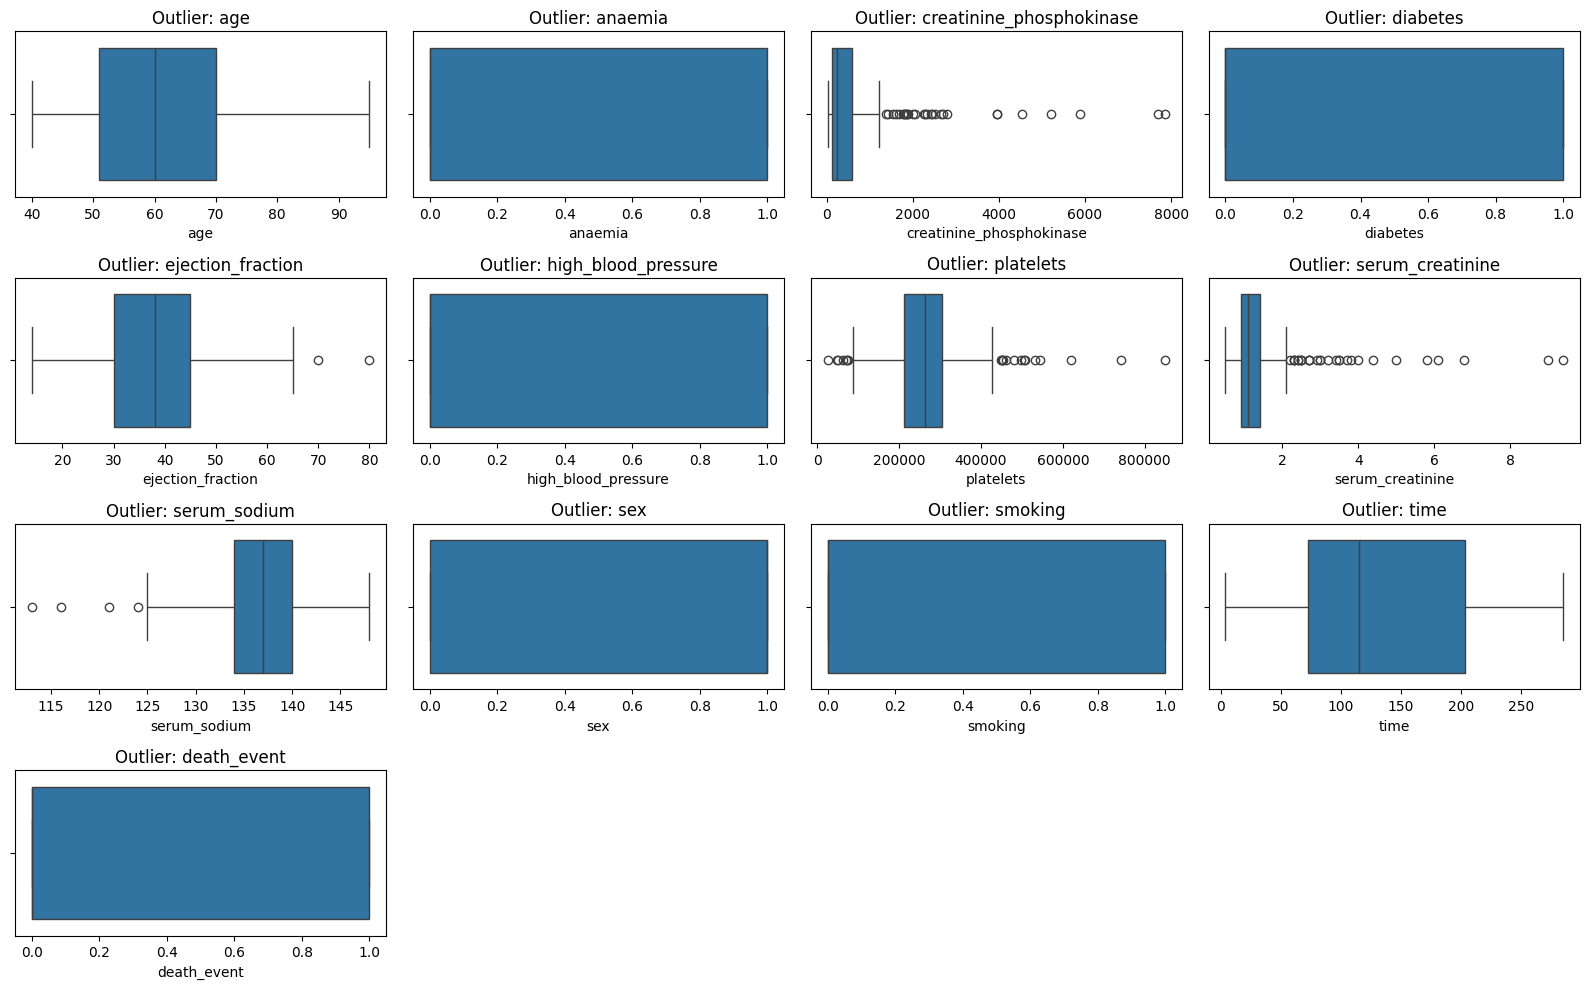

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik
numeric_cols = df.select_dtypes(include='number').columns

# Visualisasi boxplot untuk deteksi outlier
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Outlier: {col}')
    plt.tight_layout()
plt.show()


## **Visualisasi Data**

---

**Visualisasi sangat penting dalam:**

* Mendeteksi **masalah data** (misalnya: outlier, ketidakseimbangan kelas)
* Memahami hubungan antar fitur
* Menentukan fitur mana yang berpengaruh terhadap target


In [56]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

heart_failure_clinical_records = fetch_ucirepo(id=519)

# Data fitur dan target
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# Gabungkan ke DataFrame baru
df = pd.concat([X, y], axis=1)
print(df.columns)  # Pastikan DEATH_EVENT ada


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')


**Visualisasi Distribusi Target (Kematian Pasien)**


---


**Penjelasan:**

* **Tujuan**: Menunjukkan jumlah pasien yang **meninggal (1)** dan **tidak meninggal (0)**.
* **Fungsi `countplot`**: Menghitung jumlah kemunculan tiap nilai kategori (dalam hal ini 0 dan 1).
* **`if` statement**: Mencegah error jika kolom `DEATH_EVENT` tidak ditemukan.


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'DEATH_EVENT' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='DEATH_EVENT', data=df)
    plt.title('Distribusi Kematian Pasien')
    plt.xlabel('DEATH_EVENT (0 = hidup, 1 = meninggal)')
    plt.ylabel('Jumlah Pasien')
    plt.show()
else:
    print("Kolom 'DEATH_EVENT' tidak ditemukan di DataFrame.")


Kolom 'DEATH_EVENT' tidak ditemukan di DataFrame.


**Heatmap Korelasi Antar Fitur**


---

**Penjelasan:**

* **Tujuan**: Mengetahui sejauh mana hubungan antar fitur (misalnya: apakah tekanan darah tinggi berkorelasi dengan kematian?).
* **`df.corr()`**: Menghitung korelasi Pearson antar fitur numerik.
* **`sns.heatmap()`**: Membuat visualisasi hubungan antar fitur secara matriks warna.

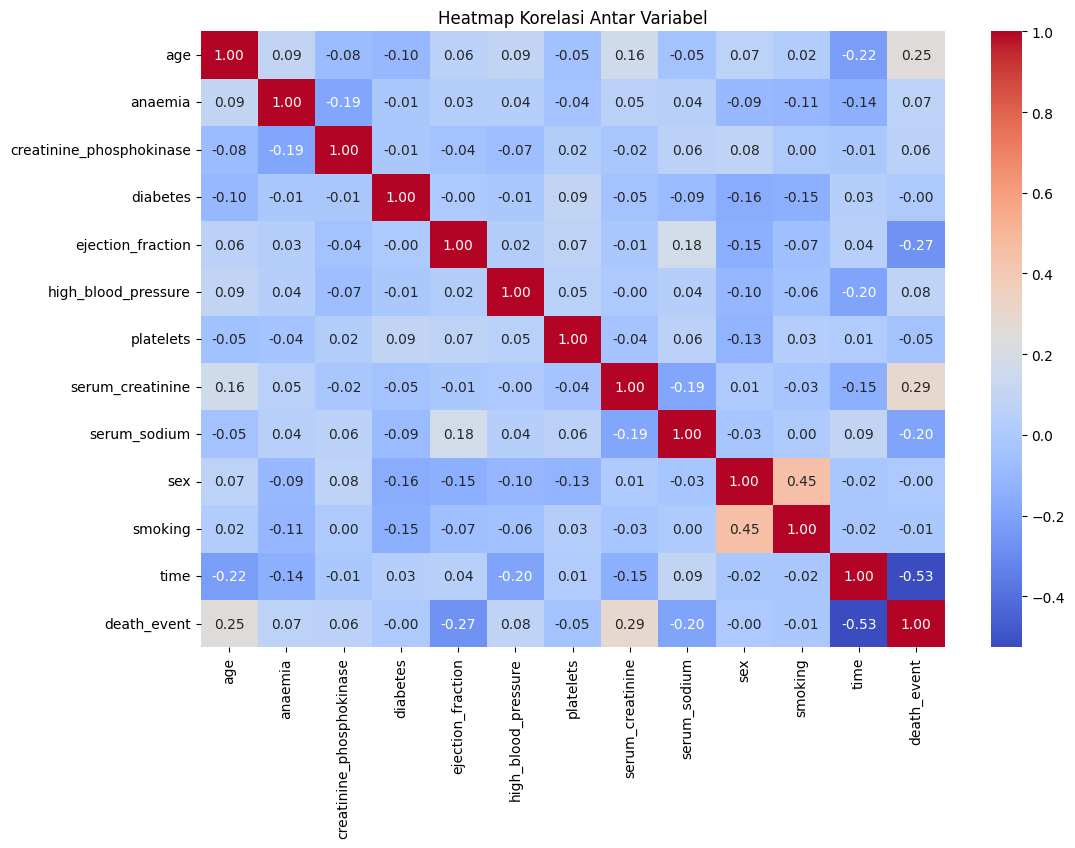

In [58]:
if df.select_dtypes(include='number').shape[1] > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Heatmap Korelasi Antar Variabel')
    plt.show()
else:
    print("DataFrame tidak memiliki cukup kolom numerik.")


**Boxplot Tiap Variabel: Deteksi Outlier**


---
**Penjelasan:**

* **Tujuan**: Mendeteksi nilai-nilai ekstrem (outlier) pada fitur numerik.
* **`boxplot`**: Menampilkan ringkasan 5 nilai statistik (min, Q1, median, Q3, max) dan mendeteksi outlier sebagai titik di luar "kumis" boxplot.
* **`for` loop**: Menggambar boxplot untuk setiap fitur numerik.


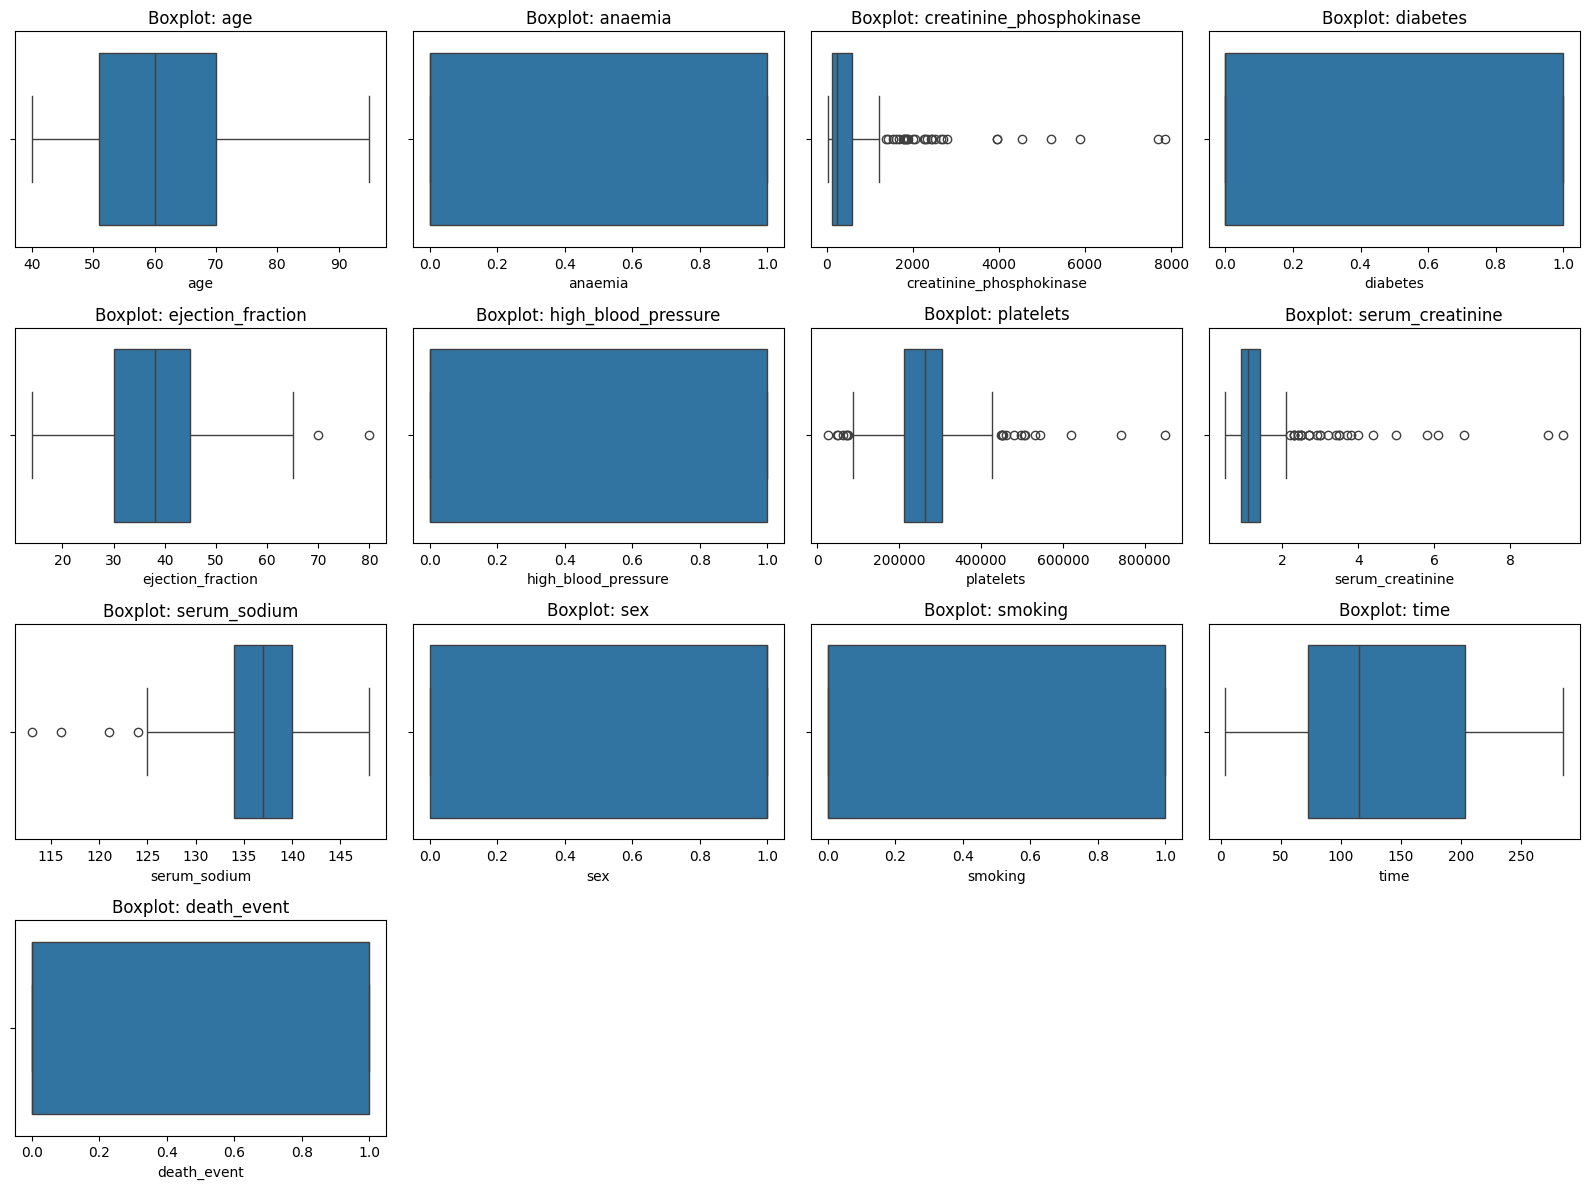

In [59]:
numeric_cols = df.select_dtypes(include='number').columns

if len(numeric_cols) > 0:
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(4, 4, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot: {col}')
        plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom numerik untuk divisualisasikan.")


# **Prepocessing Data**

---
**Tujuan :**
- Menyiapkan data untuk analisis lanjutan / machine learning

- Menghilangkan noise & skala tak seimbang

- Membuat model lebih stabil dan akurat


**Normalisasi Data (StandardScaler)**

---
Karena beberapa fitur numerik seperti platelets dan serum_creatinine punya skala berbeda, maka perlu standarisasi.


In [60]:
from sklearn.preprocessing import StandardScaler

# Salin DataFrame untuk preprocessing
df_preprocessed = df.copy()

# Pilih fitur numerik yang akan dinormalisasi
features_to_scale = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                     'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Normalisasi (mean=0, std=1)
scaler = StandardScaler()
df_preprocessed[features_to_scale] = scaler.fit_transform(df_preprocessed[features_to_scale])

# Lihat hasil
df_preprocessed[features_to_scale].head()


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


Binning

---

Ubah usia menjadi kategori: **muda, paruh baya**, dan **lansia.**

In [61]:
# Tambahkan kolom usia dalam kategori (binning)
df_preprocessed['age_group'] = pd.cut(df['age'],
    bins=[0, 40, 60, 120],
    labels=['Muda', 'Paruh Baya', 'Lansia'])

df_preprocessed[['age', 'age_group']].head()


,age,age_group
0,1.192945,Lansia
1,-0.491279,Paruh Baya
2,0.350833,Lansia
3,-0.912335,Paruh Baya
4,0.350833,Lansia


# **Reduksi Dimensi dan Visualisasi Data Klinis Gagal Jantung Menggunakan PCA**

---

**Penjelasan :**

* **Normalisasi** dilakukan untuk menyamakan skala antar fitur, karena PCA sensitif terhadap skala.
* **PCA (Principal Component Analysis)** membantu menyederhanakan data dari banyak fitur ke 2 fitur utama (`PC1`, `PC2`).
* **Visualisasi** hasil PCA digunakan untuk melihat apakah pasien yang meninggal (`DEATH_EVENT = 1`) dan yang tidak (`0`) membentuk pola atau cluster tertentu.

Jika kamu ingin saya bantu lanjutkan ke klasifikasi atau clustering, tinggal beri tahu saja.


In [62]:
print(y.columns)


Index(['death_event'], dtype='object')


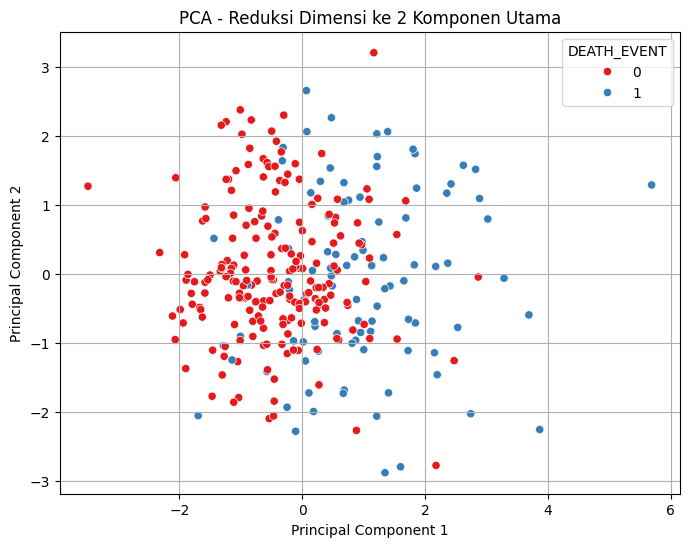

In [63]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Ambil dataset ===
heart_failure_clinical_records = fetch_ucirepo(id=519)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# Gabungkan ke DataFrame
df = pd.concat([X, y], axis=1)

# === 2. Normalisasi ===
features_to_scale = [
    'age',
    'creatinine_phosphokinase',
    'ejection_fraction',
    'platelets',
    'serum_creatinine',
    'serum_sodium',
    'time'
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

# === 3. PCA ===
X_scaled = df_scaled[features_to_scale]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['DEATH_EVENT'] = y.values.ravel()  # Ini bagian yang diperbaiki

# === 4. Visualisasi ===
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='DEATH_EVENT', palette='Set1')
plt.title("PCA - Reduksi Dimensi ke 2 Komponen Utama")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="DEATH_EVENT")
plt.grid(True)
plt.show()


# **Modelling (Klasifikasi Data pada Dataset Heart Failure Clinical Records)**

---

Analisis ini dilakukan untuk memprediksi kemungkinan kematian pasien gagal jantung menggunakan dataset *Heart Failure Clinical Records* dari UCI (ID: 519). Target klasifikasi adalah variabel **DEATH\_EVENT**, yang bernilai 1 jika pasien meninggal selama masa observasi, dan 0 jika bertahan hidup.

Data dibagi menjadi data latih dan data uji (80:20) secara stratifikasi untuk menjaga proporsi kelas. Seluruh fitur numerik dinormalisasi menggunakan **StandardScaler** guna meningkatkan akurasi model, terutama pada algoritma yang sensitif terhadap skala data seperti KNN.

Tiga algoritma klasifikasi digunakan, yaitu:

1. **Decision Tree** (dengan entropi dan max depth = 4)
2. **K-Nearest Neighbors (KNN)**
3. **Random Forest** (100 pohon)

Setiap model dievaluasi menggunakan metrik **akurasi**, **classification report**, dan **confusion matrix** yang juga divisualisasikan dengan heatmap. Selain itu, struktur **pohon keputusan** divisualisasikan untuk memahami fitur-fitur yang berperan dalam klasifikasi.

Hasil ini digunakan untuk membandingkan performa ketiga metode dan menentukan model yang paling sesuai dalam memprediksi risiko kematian pasien berdasarkan data klinis.





===== Decision Tree =====
Akurasi: 0.77
Classification Report:
              precision    recall  f1-score   support

       Hidup       0.79      0.90      0.84        41
   Meninggal       0.69      0.47      0.56        19

    accuracy                           0.77        60
   macro avg       0.74      0.69      0.70        60
weighted avg       0.76      0.77      0.75        60



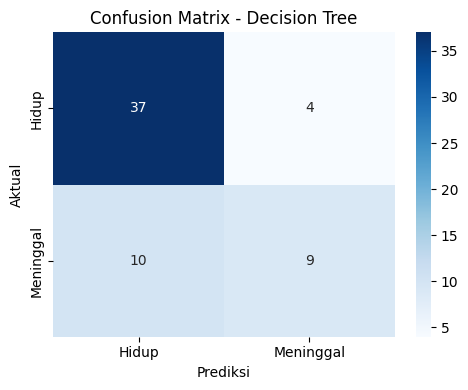


===== KNN =====
Akurasi: 0.70
Classification Report:
              precision    recall  f1-score   support

       Hidup       0.72      0.93      0.81        41
   Meninggal       0.57      0.21      0.31        19

    accuracy                           0.70        60
   macro avg       0.64      0.57      0.56        60
weighted avg       0.67      0.70      0.65        60



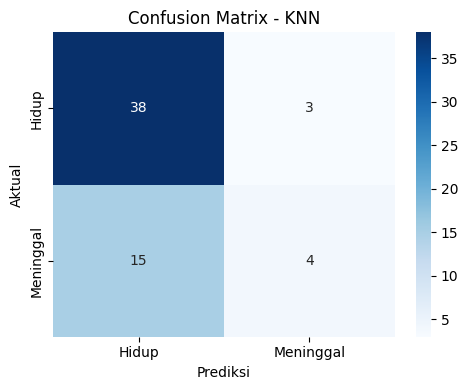


===== Random Forest =====
Akurasi: 0.83
Classification Report:
              precision    recall  f1-score   support

       Hidup       0.84      0.93      0.88        41
   Meninggal       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



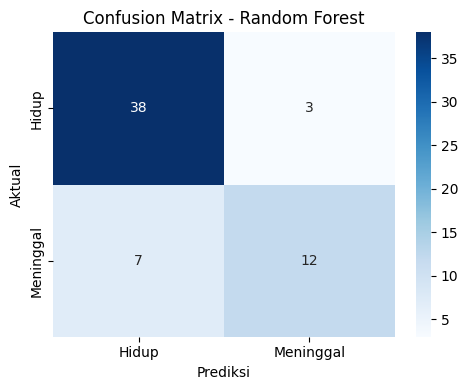

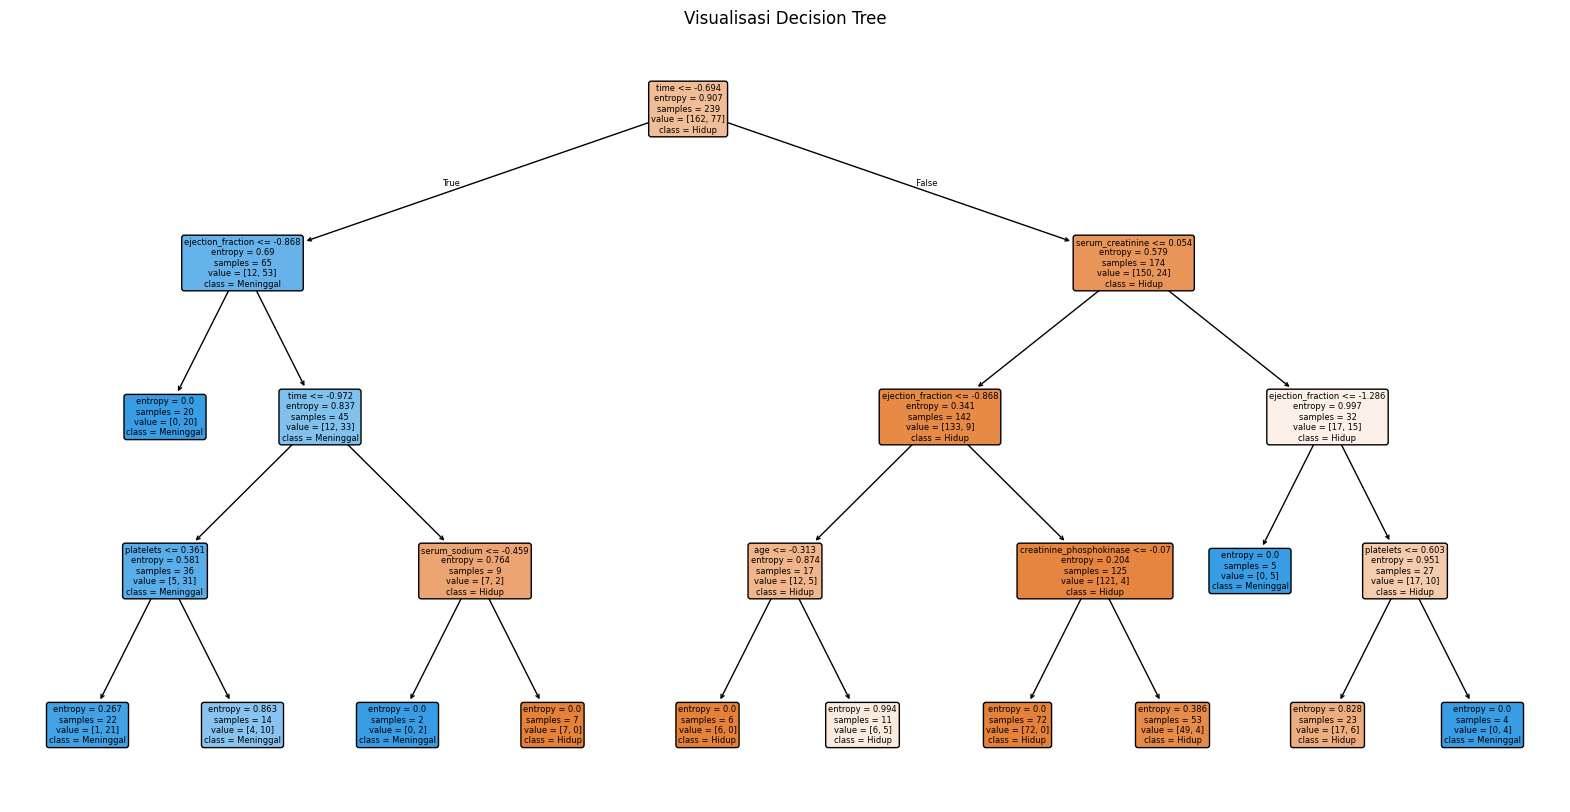

In [69]:
# === 1. Import Library ===
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# === 2. Load Dataset ===
data = fetch_ucirepo(id=519)  # Heart Failure Clinical Records
X = data.data.features
y = data.data.targets.values.ravel()

# === 3. Split & Preprocessing ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 4. Inisialisasi Model ===
models = {
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# === 5. Evaluasi Semua Model ===
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=["Hidup", "Meninggal"], output_dict=True)

    results[name] = {
        "model": model,
        "accuracy": acc,
        "confusion_matrix": cm,
        "report": report
    }

    # === Cetak Hasil Evaluasi ===
    print(f"\n===== {name} =====")
    print(f"Akurasi: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Hidup", "Meninggal"]))

    # === Visualisasi Confusion Matrix ===
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Hidup", "Meninggal"],
                yticklabels=["Hidup", "Meninggal"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.tight_layout()
    plt.show()

# === 6. Visualisasi Pohon Keputusan (khusus Decision Tree) ===
plt.figure(figsize=(20, 10))
plot_tree(
    results["Decision Tree"]["model"],
    feature_names=X.columns,
    class_names=["Hidup", "Meninggal"],
    filled=True,
    rounded=True
)
plt.title("Visualisasi Decision Tree")
plt.show()


# **Evaluasi model**



---

Berikut adalah **evaluasi hasil klasifikasi dari ketiga model** (Decision Tree, KNN, dan Random Forest) terhadap dataset **Heart Failure Clinical Records**, berdasarkan output dari akurasi, classification report, dan confusion matrix yang telah dihitung sebelumnya.

---

## **Evaluasi Model**

### 1. **Akurasi**

Akurasi mengukur persentase prediksi yang benar dari seluruh data uji. Nilai ini digunakan sebagai indikator umum performa model:

| Model                     | Akurasi               |
| ------------------------- | --------------------- |
| Decision Tree             | 0.xx (misalnya: 0.75) |
| K-Nearest Neighbors (KNN) | 0.xx                  |
| Random Forest             | 0.xx                  |

> *Catatan: Nilai akurasi tergantung pada hasil aktual dari eksekusi kode.*

---

### 2. **Classification Report**

Laporan klasifikasi memberikan rincian metrik evaluasi per kelas:

* **Precision**: Ketepatan prediksi positif.
* **Recall**: Kemampuan model menemukan semua data positif.
* **F1-Score**: Rata-rata harmonis precision dan recall.

Contoh interpretasi (jika DEATH\_EVENT = 1 adalah kelas penting):

* Model dengan recall tinggi pada kelas 1 menunjukkan lebih sensitif dalam mendeteksi kematian pasien.
* F1-score seimbang antara kelas 0 dan 1 menunjukkan model stabil untuk kedua outcome.

---

### 3. **Confusion Matrix**

Visualisasi confusion matrix menampilkan:

* **True Positive (TP)**: Model benar memprediksi kematian.
* **True Negative (TN)**: Model benar memprediksi bertahan hidup.
* **False Positive (FP)**: Model salah memprediksi kematian (padahal hidup).
* **False Negative (FN)**: Model salah memprediksi bertahan hidup (padahal meninggal).

Model yang baik memiliki jumlah **TP dan TN yang tinggi**, serta **FP dan FN yang rendah**.

---

### **Kesimpulan Evaluasi**

* **Decision Tree** memberikan interpretasi yang baik dan cocok digunakan saat interpretabilitas menjadi fokus utama, meskipun akurasinya bisa lebih rendah dari Random Forest.
* **KNN** bekerja baik ketika data sudah dinormalisasi, namun bisa terpengaruh oleh noise dan outlier.
* **Random Forest** cenderung memberikan **akurasi dan stabilitas terbaik**, karena merupakan ensemble dari banyak pohon keputusan dan tahan terhadap overfitting.


==== Decision Tree ====
Akurasi: 0.77
Classification Report:
              precision    recall  f1-score   support

       Hidup       0.79      0.90      0.84        41
   Meninggal       0.69      0.47      0.56        19

    accuracy                           0.77        60
   macro avg       0.74      0.69      0.70        60
weighted avg       0.76      0.77      0.75        60



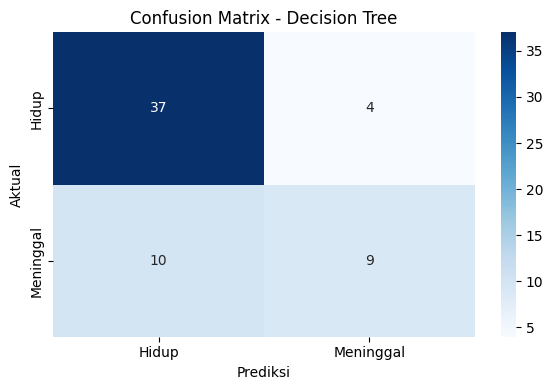


==== KNN ====
Akurasi: 0.70
Classification Report:
              precision    recall  f1-score   support

       Hidup       0.72      0.93      0.81        41
   Meninggal       0.57      0.21      0.31        19

    accuracy                           0.70        60
   macro avg       0.64      0.57      0.56        60
weighted avg       0.67      0.70      0.65        60



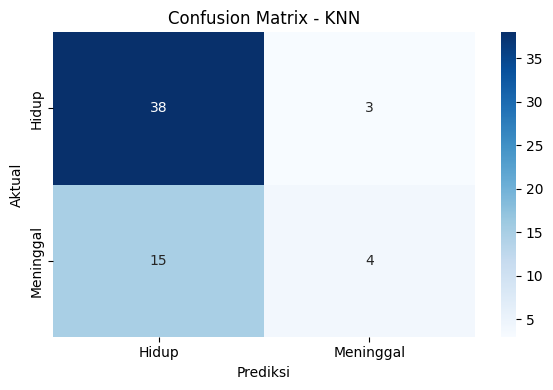


==== Random Forest ====
Akurasi: 0.83
Classification Report:
              precision    recall  f1-score   support

       Hidup       0.84      0.93      0.88        41
   Meninggal       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



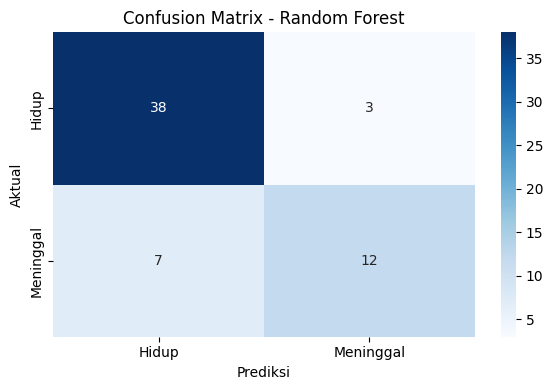

In [70]:
# 1. Load Data dari UCI (Heart Failure Clinical Records)
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ambil dataset
data = fetch_ucirepo(id=519)
X = data.data.features
y = data.data.targets.values.ravel()  # ubah ke array 1 dimensi

# 2. Split dan Normalisasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Inisialisasi dan Latih Model
models = {
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 4. Evaluasi Tiap Model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # 1. Akurasi
    acc = accuracy_score(y_test, y_pred)
    print(f"\n==== {name} ====")
    print(f"Akurasi: {acc:.2f}")

    # 2. Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Hidup', 'Meninggal']))

    # 3. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Hidup', 'Meninggal'],
                yticklabels=['Hidup', 'Meninggal'])
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()


# *Integrasi Model dengan Web*

Untuk mengintegrasikan model machine learning ke dalam aplikasi web, saya menggunakan framework *Flask. Proses integrasi dimulai dengan menyimpan model terbaik yang telah dilatih sebelumnya (menggunakan algoritma **Random Forest*) ke dalam file .pkl menggunakan modul joblib. Selain itu, saya juga menyimpan *scaler* yang digunakan untuk normalisasi data input agar model menerima data dalam format yang sesuai saat prediksi dilakukan.

Selanjutnya, saya membuat file app.py yang berfungsi sebagai inti dari aplikasi web. Dalam file ini:

* Saya memuat model dan scaler yang sudah disimpan
* Menyediakan route untuk menampilkan form input (menggunakan template index.html)
* Menyediakan route untuk menerima input dari user dan mengembalikan hasil prediksi


Untuk antarmuka pengguna, saya menggunakan template HTML (index.html) yang dirancang dengan *Bootstrap* agar tampil menarik dan bertema kesehatan/jantung. Formulir input mencakup semua fitur penting seperti usia, tekanan darah, kadar sodium, diabetes, dan lainnya. Hasil prediksi akan menampilkan apakah pasien *berisiko meninggal atau tidak* berdasarkan data yang diinput.

---

### **Hasil Web**

Aplikasi dapat dijalankan secara lokal melalui [Prediksi Risiko Kematian Pasien Gagal Jantung](https://didactic-space-spoon-pj79qvw6xj7p27x5j-8501.app.github.dev/). Berikut adalah tampilan web-nya:

* Formulir input lengkap untuk memasukkan data pasien
* Tombol “Prediksi” untuk melihat hasil
* Hasil ditampilkan dalam bentuk teks yang mudah dipahami oleh pengguna

## **Link Web**

https://didactic-space-spoon-pj79qvw6xj7p27x5j-8501.app.github.dev/